In [1]:
import pandas as pd
import numpy as np
import youtokentome as yttm
import re
import matplotlib.pyplot as plt

In [2]:
bpe = yttm.BPE('BPE_10000.model')

In [2]:
train = pd.read_csv('train.csv')

In [4]:
# Проверка наличия пропущенных данных
train.shape, train['comment_text'].dropna().shape

((159571, 8), (159571,))

In [5]:
X = bpe.encode([' '.join(re.findall(r'[\w]+', i.lower())) for i in train['comment_text'].values])
y = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values.tolist()

In [6]:
# Количество объектов с нулевый label
(y == np.zeros((6))).all(axis=1).sum()

143346

In [7]:
# Количество комментариев по label
for i in range(6):
    print(i, (np.array(y)[:,i] == 1).sum())

0 15294
1 1595
2 8449
3 478
4 7877
5 1405


In [8]:
# Посмотрим на длины текстов
lengthes = np.array([np.log(len(i)) for i in X])

In [9]:
# Выбор оптимальной длины на обучение
(lengthes <= np.log(200)).sum(), lengthes.shape

(146282, (159571,))

In [10]:
# Количество слов в датасете
voc = set()
for t in train['comment_text']:
    voc.update(re.findall(r'[\w]+', t.lower()))

In [11]:
len(voc)

190339

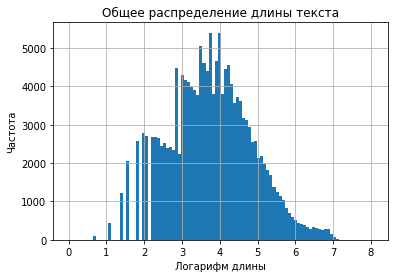

In [12]:
pd.DataFrame(lengthes).hist(bins=100)
plt.title('Общее распределение длины текста')
plt.ylabel('Частота')
plt.xlabel('Логарифм длины')
plt.show()

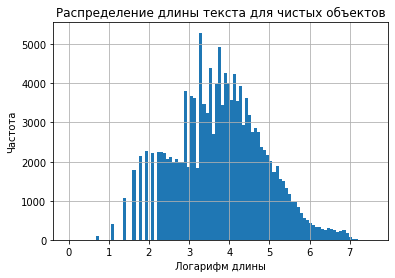

In [13]:
pd.DataFrame(lengthes[(y == np.zeros((6))).all(axis=1)]).hist(bins=100)
plt.title('Распределение длины текста для чистых объектов')
plt.ylabel('Частота')
plt.xlabel('Логарифм длины')
plt.show()

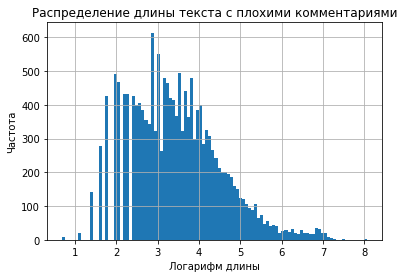

In [14]:
pd.DataFrame(lengthes[(y != np.zeros((6))).any(axis=1)]).hist(bins=100)
plt.title('Распределение длины текста с плохими комментариями')
plt.ylabel('Частота')
plt.xlabel('Логарифм длины')
plt.show()

In [15]:
# Оценка различий среднего
print(lengthes[(y == np.zeros((6))).all(axis=1)].mean(), lengthes[(y != np.zeros((6))).any(axis=1)].mean())

3.7975333246059177 3.4327185894519228


In [16]:
print(lengthes[(y == np.zeros((6))).all(axis=1)].std(), lengthes[(y != np.zeros((6))).any(axis=1)].std())

1.09578921296671 1.0887962131219988


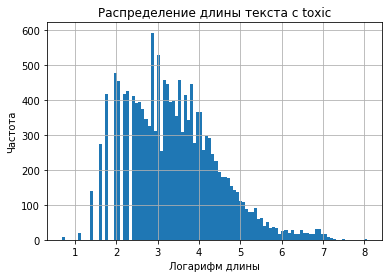

In [17]:
pd.DataFrame(lengthes[(y * np.array([1, 0, 0, 0, 0, 0]) != np.zeros((6))).any(axis=1)]).hist(bins=100)
plt.title('Распределение длины текста с toxic')
plt.ylabel('Частота')
plt.xlabel('Логарифм длины')
plt.show()

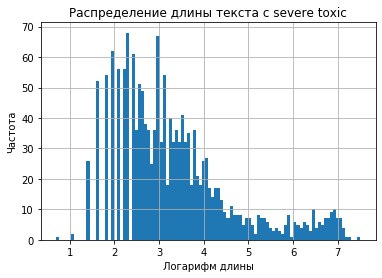

In [18]:
pd.DataFrame(lengthes[(y * np.array([0, 1, 0, 0, 0, 0]) != np.zeros((6))).any(axis=1)]).hist(bins=100)
plt.title('Распределение длины текста с severe toxic')
plt.ylabel('Частота')
plt.xlabel('Логарифм длины')
plt.show()

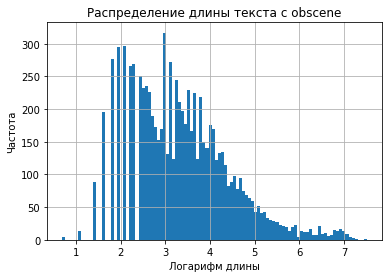

In [19]:
pd.DataFrame(lengthes[(y * np.array([0, 0, 1, 0, 0, 0]) != np.zeros((6))).any(axis=1)]).hist(bins=100)
plt.title('Распределение длины текста с obscene')
plt.ylabel('Частота')
plt.xlabel('Логарифм длины')
plt.show()

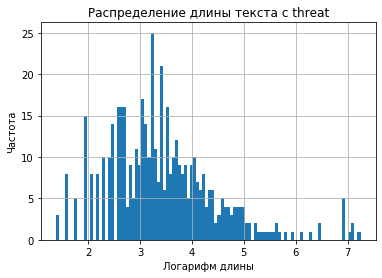

In [20]:
pd.DataFrame(lengthes[(y * np.array([0, 0, 0, 1, 0, 0]) != np.zeros((6))).any(axis=1)]).hist(bins=100)
plt.title('Распределение длины текста с threat')
plt.ylabel('Частота')
plt.xlabel('Логарифм длины')
plt.show()

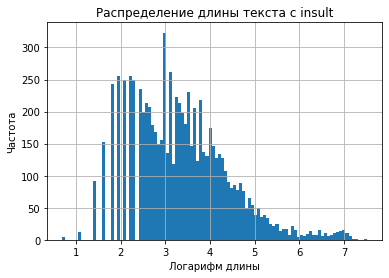

In [21]:
pd.DataFrame(lengthes[(y * np.array([0, 0, 0, 0, 1, 0]) != np.zeros((6))).any(axis=1)]).hist(bins=100)
plt.title('Распределение длины текста с insult')
plt.ylabel('Частота')
plt.xlabel('Логарифм длины')
plt.show()

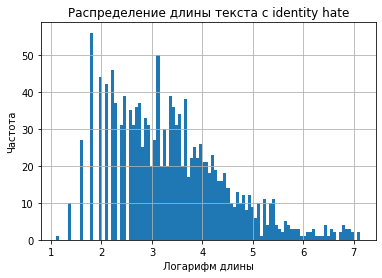

In [22]:
pd.DataFrame(lengthes[(y * np.array([0, 0, 0, 0, 0, 1]) != np.zeros((6))).any(axis=1)]).hist(bins=100)
plt.title('Распределение длины текста с identity hate')
plt.ylabel('Частота')
plt.xlabel('Логарифм длины')
plt.show()